# <center>网络流量日志分析</center>

## 一、数据导入

### 1.1 数据导入

In [1]:
import pandas
import pandas as pd
LOG_TAG = '<PNB4001>'

# 读取日志文件并清洗
def read_log_file(filename):
    with open(filename, 'r', encoding='utf-8', errors='ignore') as file:
        lines = [line.strip() for line in file if line.strip()]
    # 两种日志
    DNS_list = []
    HTTP_list = []
    for line in lines:
        result = log_sort(line)
        if result[0]:
            # 根据日志字段数量判断日志类型
            if result[1] == 10:
                DNS_list.append(line)
            elif result[1] == 13:
                HTTP_list.append(line)
    return DNS_list, HTTP_list
# 根据是否含有标识符来判断是否是所需日志
def log_sort(log_str):
    return LOG_TAG in log_str, len(log_str.split())

### 1.2 判断字段属性

In [2]:
# 设置字段，并将list转换为DataFram
def list_to_df(DNS_list, HTTP_list):
    DNS_data = pd.DataFrame([x.split() for x in DNS_list],
                            columns=['时间戳', '记录网关', '标识符', '日志批次', '上网设备MAC地址',
                                     '上网设备IP地址', '源端口', 'DNS服务器地址', '目的端口', '查询地址'])
    DNS_data['时间戳'] = pandas.to_datetime(DNS_data['时间戳'])
    DNS_data['时间戳'] = DNS_data['时间戳'].dt.tz_convert('UTC').dt.strftime('%Y-%m-%d %H:%M:%S')
    HTTP_data = pd.DataFrame([x.split() for x in HTTP_list],
                             columns=['时间戳', '记录网关', '标识符', '日志批次', '上网设备MAC地址',
                                      '上网设备IP地址', '源端口', '目的地址', '目的端口', '未知符号',
                                      '方式', '目的域名', 'url详情'])
    HTTP_data['时间戳'] = pandas.to_datetime(HTTP_data['时间戳'])
    HTTP_data['时间戳'] = HTTP_data['时间戳'].dt.tz_convert('UTC').dt.strftime('%Y-%m-%d %H:%M:%S')
    return DNS_data, HTTP_data

### 1.3 查看日志信息

In [3]:
# 获取日志信息
dns_list, http_list = read_log_file('./files/192.168.35.2.log')
dns_df, http_df = list_to_df(dns_list, http_list)

#### 1.3.1 DNS日志

In [4]:
dns_df.head()

,时间戳,记录网关,标识符,日志批次,上网设备MAC地址,上网设备IP地址,源端口,DNS服务器地址,目的端口,查询地址
0,2023-11-05 18:20:55,192.168.35.2,<PNB4001>dnsquery3,1699208451,00-0c-29-f5-5f-80,192.168.55.10,64450,114.114.114.114,53,dns.msftncsi.com
1,2023-11-05 18:20:56,192.168.35.2,<PNB4001>dnsquery3,1699208451,00-0c-29-f5-5f-80,192.168.55.10,49666,114.114.114.114,53,ipv6.msftconnecttest.com
2,2023-11-05 18:20:56,192.168.35.2,<PNB4001>dnsquery3,1699208451,00-0c-29-f5-5f-80,192.168.55.10,51840,114.114.114.114,53,ipv6.msftconnecttest.com
3,2023-11-05 18:20:56,192.168.35.2,<PNB4001>dnsquery3,1699208452,00-0c-29-f5-5f-80,192.168.55.10,64450,114.114.114.114,53,dns.msftncsi.com
4,2023-11-05 18:20:57,192.168.35.2,<PNB4001>dnsquery3,1699208453,00-0c-29-f5-5f-80,192.168.55.10,64450,114.114.114.114,53,dns.msftncsi.com


#### 1.3.2 HTTP日志

In [5]:
http_df.head()

,时间戳,记录网关,标识符,日志批次,上网设备MAC地址,上网设备IP地址,源端口,目的地址,目的端口,未知符号,方式,目的域名,url详情
0,2023-11-05 18:21:01,192.168.35.2,<PNB4001>HTTP4,1699208457,00-0c-29-f5-5f-80,192.168.55.10,49671,111.206.170.195,80,1,GET,s.360.cn,/safe/instcomp.htm?soft=2023082219&status=1&mi...
1,2023-11-05 18:21:42,192.168.35.2,<PNB4001>HTTP4,1699208497,00-0c-29-f5-5f-80,192.168.55.10,49693,123.6.47.55,80,1,GET,wp.safe.360.cn,/xtrk/acntr.gif?prod=frontskin&act=stat&mid=18...
2,2023-11-05 18:21:42,192.168.35.2,<PNB4001>HTTP4,1699208498,00-0c-29-f5-5f-80,192.168.55.10,49694,112.64.200.233,80,384,POST,conf.wsm.360.cn,/client/query2?&m=186c9a7e7fcb8161dce51b3fbd23...
3,2023-11-05 18:21:42,192.168.35.2,<PNB4001>HTTP4,1699208498,00-0c-29-f5-5f-80,192.168.55.10,49695,112.64.200.233,80,384,POST,conf.wsm.360.cn,/client/query2?&m=186c9a7e7fcb8161dce51b3fbd23...
4,2023-11-05 18:21:42,192.168.35.2,<PNB4001>HTTP4,1699208498,00-0c-29-f5-5f-80,192.168.55.10,49697,112.64.200.233,80,384,POST,conf.wsm.360.cn,/client/query2?&m=186c9a7e7fcb8161dce51b3fbd23...


## 二、日志分析

### 2.1 日志数量

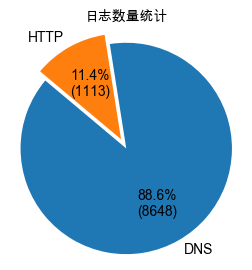

In [24]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font_path = './files/fonts/Arial Unicode.ttf'
my_font = FontProperties(fname=font_path)
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题


labels = ['DNS', 'HTTP']
sizes = [len(dns_df), len(http_df)]
explode = (0.1, 0)

plt.figure(figsize=(3,3))

# 定义一个显示百分比和具体数量的格式化函数
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute})"

plt.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
plt.axis('equal')  # 保持长宽比相等
plt.title('日志数量统计', fontproperties=my_font)  # 设置标题为中文
plt.show()

### (一) DNS分析

#### 1. TOP10 查询地址

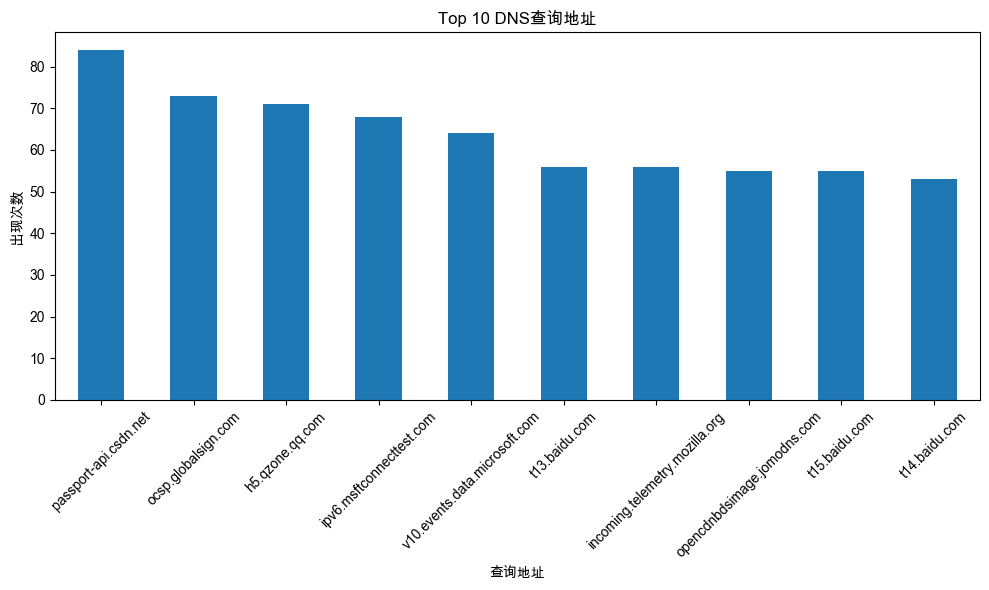

In [23]:
top_five_addresses = dns_df['查询地址'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_five_addresses.plot(kind='bar')
plt.title('Top 10 DNS查询地址')
plt.xlabel('查询地址')
plt.ylabel('出现次数')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 释放空间
del top_five_addresses

#### 2. DNS查询量变化趋势

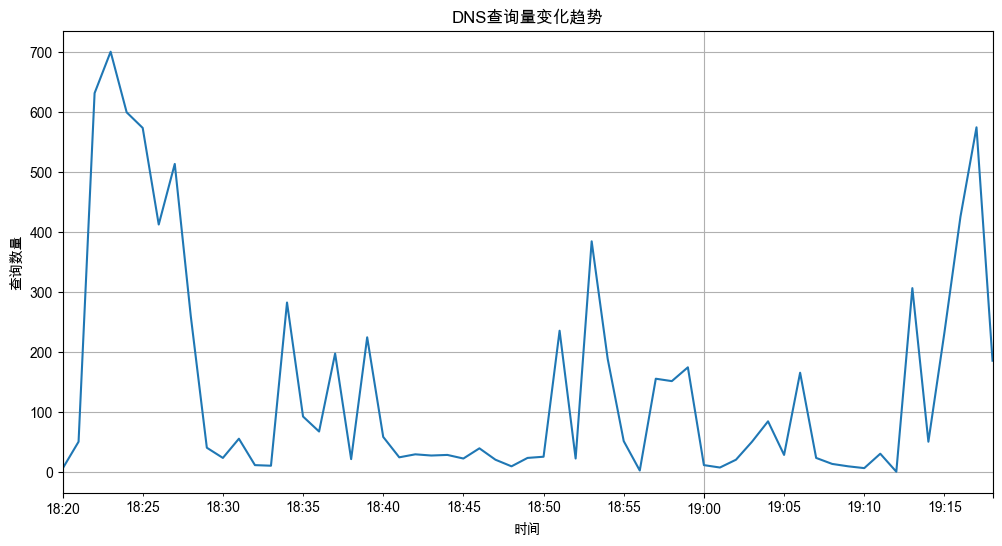

In [21]:
# 复制源数据
dns_df_by_times = dns_df
# 把列索引格式改为时间
dns_df_by_times.index = pd.to_datetime(dns_df_by_times.index)
# 以分钟为粒度计数
dns_df_minute = dns_df_by_times['查询地址'].resample('T').count()

# 绘制时间序列图
plt.figure(figsize=(12, 6))
dns_df_minute.plot(title='DNS查询量变化趋势', xlabel='时间', ylabel='查询数量')
plt.grid(True)
plt.show()

# 释放空间
del dns_df_by_times

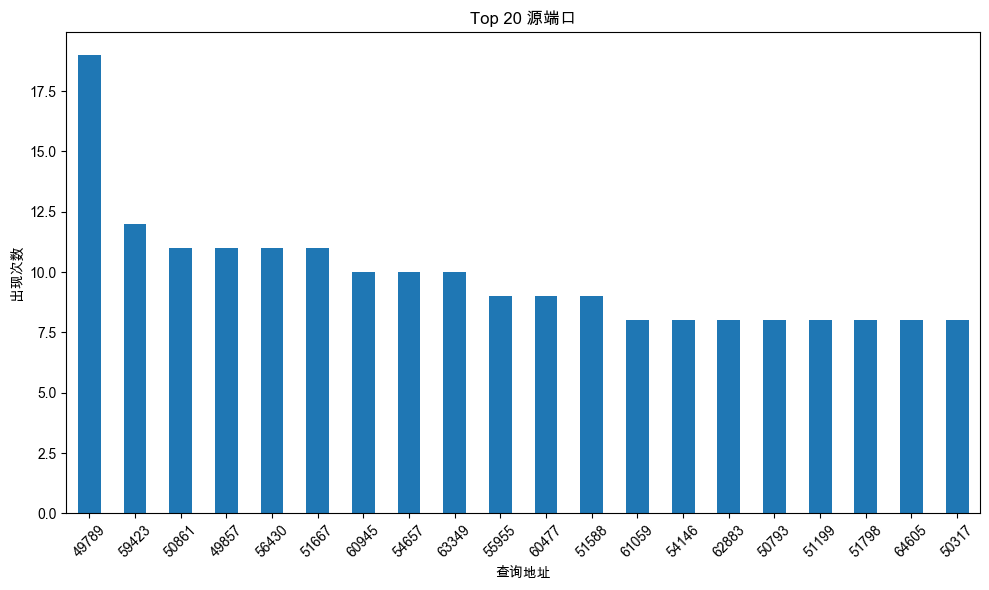